In [1]:
import numpy as np

import pylab as plt

import scipy

import igraph as ig

In [2]:
Cov = [ np.matrix([1,0.9,0.9,1]).reshape(2,2), 
      np.matrix([1,-0.9,-0.9,1]).reshape(2,2)]

In [3]:
Omega = [np.linalg.inv(x) for x in Cov]

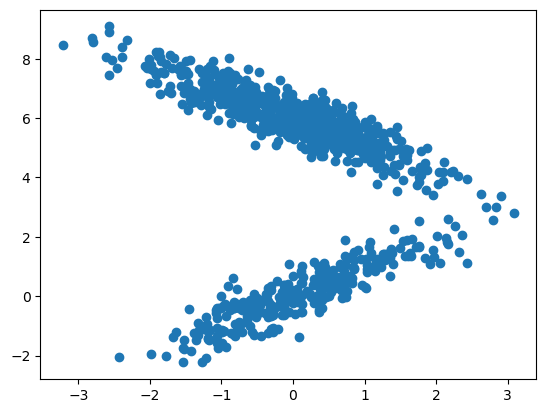

In [4]:
Mu = [np.matrix([0,0]).reshape(1,2), np.matrix([0,6]).reshape(1,2)]
w = np.array([0.6,0.4])


y = np.vstack([ np.random.normal(0,1,[300,2])@ np.linalg.cholesky(Cov[0]).T + Mu[0],  np.random.normal(0,1,[700,2])@ np.linalg.cholesky(Cov[1]).T + Mu[1] ])
y = np.array(y)
plt.scatter(y[:,0],y[:,1])


In [5]:
d = 0
p = d + 2

In [6]:
theta = np.repeat(0,p)

def logMixDensity(theta):

    theta0 = theta[:2]
    theta1 = theta[2:]
    
    Mu = [np.matrix([0,0]).reshape(1,2), np.matrix([0,6]).reshape(1,2)]
    w = np.array([0.6,0.4])
    
    Cov = [ np.matrix([1,0.9,0.9,1]).reshape(2,2), 
    np.matrix([1,-0.9,-0.9,1]).reshape(2,2)]
    
    logd0 = scipy.stats.multivariate_normal.logpdf(theta0,mean= np.array(Mu[0]).squeeze(),cov=Cov[0]) + np.log(w[0])
    logd1 = scipy.stats.multivariate_normal.logpdf(theta0,mean= np.array(Mu[1]).squeeze(),cov=Cov[1]) + np.log(w[1])

    return scipy.special.logsumexp([logd0,logd1]) -  np.sum(theta1**2)/2

In [7]:
import scipy.stats as st


In [8]:
beta_size = 50

beta_scale =0.5

beta = np.vstack([ np.random.normal(0,1,[int(beta_size/2),2])*beta_scale + Mu[0],  np.random.normal(0,1,[int(beta_size/2),2])*beta_scale + Mu[1] ])
beta = np.array(beta)

beta = np.hstack([ beta, np.random.normal(0,1, [beta_size,d])] )

In [9]:
# Extract x and y
y0 = y[:, 0]
y1 = y[:, 1]
# Define the borders
deltaX = (max(y0) - min(y0))/10
deltaY = (max(y1) - min(y1))/10
xmin = min(y0) - deltaX
xmax = max(y0) + deltaX
ymin = min(y1) - deltaY
ymax = max(y1) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

-3.8478143987402635 3.714621480819738 -3.3669790485118707 10.217371353120637


In [10]:
positions = np.vstack([xx.ravel(), yy.ravel()])

In [11]:
f= np.exp(np.reshape( np.array([logMixDensity(positions[:,i]) for i in range( positions.shape[1])]),  xx.shape))

In [12]:
from scipy.spatial.distance import cdist as dist



J = beta.shape[0]

logDensityBeta = np.array([logMixDensity(beta[i]) for i in range(beta.shape[0])]).reshape([J,1])

distLogDensityBeta= scipy.spatial.distance.cdist(logDensityBeta,logDensityBeta)
distBeta= scipy.spatial.distance.cdist(beta,beta)



kappa = 1

Graph_weights = (distLogDensityBeta< kappa)* kappa  / (1+ distBeta)  +  (distLogDensityBeta> kappa)* distLogDensityBeta

# Graph_weights = distBeta



G0= ig.Graph().Weighted_Adjacency(Graph_weights,mode='undirected',loops=False)

weight = [w for w in G0.es["weight"]]

G = G0.spanning_tree(weights=weight)

# plt.scatter(beta[:,0],beta[:,1])


In [13]:
plt.rcParams.update({'font.size': 22})


In [14]:
beta.shape

(50, 2)

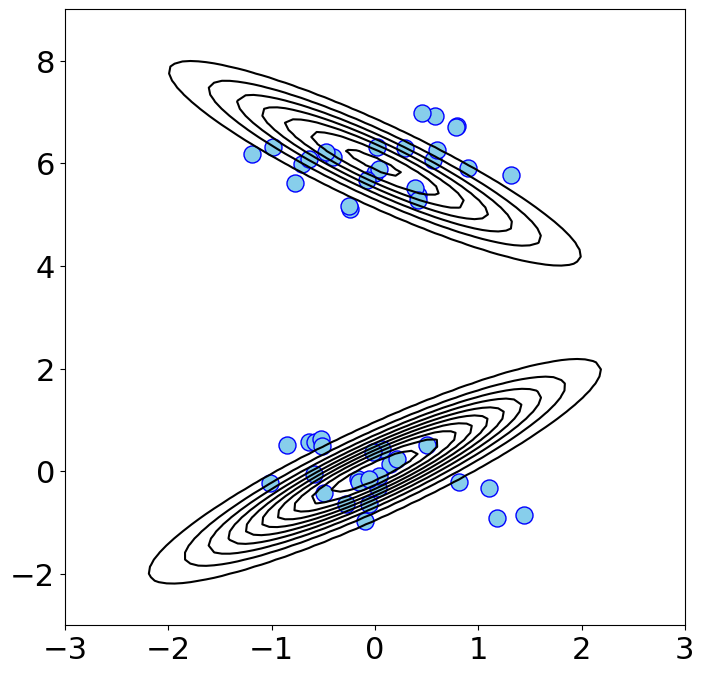

In [15]:

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 9)

# cfset = ax.contourf(xx, yy, f,levels=10,cmap='coolwarm')
# cfset.cmap.set_under('w')
# cfset.set_clim(0.009)
# ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])


cset = ax.contour(xx, yy, f,levels=10, colors='k')
# ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('')
# plt.title('2D Gaussian Kernel density estimation')
ax.scatter(beta[:,0],beta[:,1],s=150, alpha=1, facecolors='skyblue',  edgecolors='blue')

# plt.savefig("gmm_counter_approx_samples.png",dpi=100,bbox_inches='tight')


# for e in G.get_edgelist():
    # ax.plot( beta[e,0],beta[e,1],c='blue',linestyle='dashed',alpha=0.5)

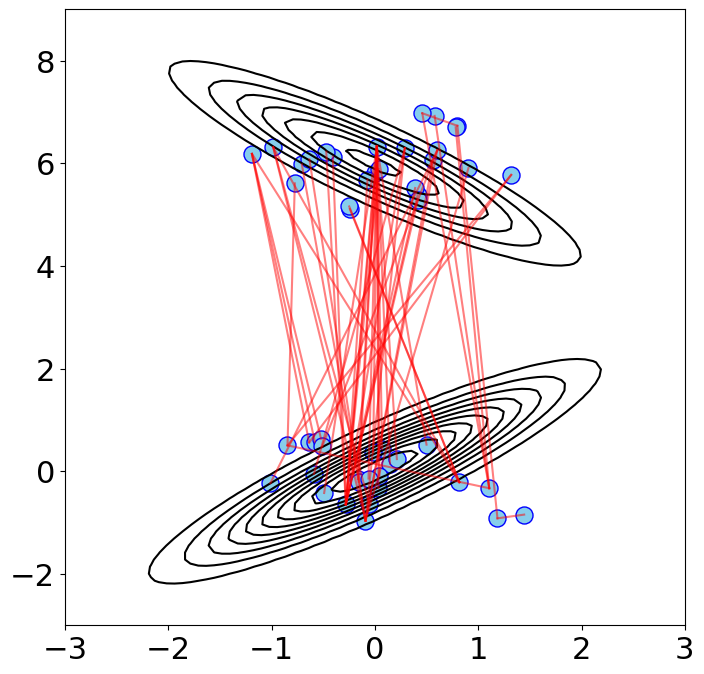

In [16]:

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 9)

# cfset = ax.contourf(xx, yy, f,levels=10,cmap='coolwarm')
# cfset.cmap.set_under('w')
# cfset.set_clim(0.009)
# ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])


cset = ax.contour(xx, yy, f,levels=10, colors='k')
# ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('')
# plt.title('2D Gaussian Kernel density estimation')


for e in G.get_edgelist():
    ax.plot( beta[e,0],beta[e,1],c='red',linestyle='solid',alpha=0.5)
    
    
ax.scatter(beta[:,0],beta[:,1],s=150, alpha=1, facecolors='skyblue',  edgecolors='blue')

    
# plt.savefig("gmm_counter_approx_samples_graph.png",dpi=100,bbox_inches='tight')


In [17]:
ball_r = 1

# step size for random walk
s = 1

In [18]:
p = 2

In [19]:
def projToBetaJ(theta):
    return dist(np.array([theta]),beta).argmin()

In [20]:
logDensity = logMixDensity 

In [21]:
import scipy as scp

In [22]:
Bisection = scp.optimize.bisect
def findProjInterval(x,v,w=1.0, l= 1E5):
    
    j = projToBetaJ(x)
    
    def f(z):
        return np.abs(projToBetaJ(x+ z*v) - j)-0.1 #make it slightly below zero
    
    w_l = -w
    w_r = +w

    while f(w_l) < 0 and (-w_l)< l:
            w_l*=2
    while f(w_r) < 0 and w_r< l:
            w_r*=2


            
    if w_l == -w:
        w_l_half =0
    else:
        w_l_half = w_l/2.0

    if w_r == w:
        w_r_half =0
    else:
        w_r_half = w_r/2.0
    
    if (-w_l) < l:
        lb = Bisection(f,w_l,w_l_half,maxiter=1000)
    else:
        lb = -l
    
    if (w_r) < l:
        ub = Bisection(f,w_r_half,w_r,maxiter=1000)
    else:
        ub = l

    return (lb,ub)

              

In [23]:
def randomWalkMetropolis(theta, s = 1):
    # canonical random-walk Metropolis

    curLogpost = logDensity(theta)
    theta_star = theta + np.random.uniform(-1,1,[p])*s #np.random.normal(0,1,[p])*s
    propLogpost = logDensity(theta_star)
    accept = 0
    if np.log(np.random.uniform(0,1,1))<(propLogpost - curLogpost):
        theta = theta_star
        accept =1
    return (theta,accept)

In [24]:
from tqdm.notebook import tqdm
import time


In [25]:
def runGraphAccMCMC(theta_ini, algo_choice_w=0.5, steps= 10000, burnin = 0.5, s =1, ball_r=1,
                    ball_remove_center=True,
                    proj_dist_limit = 1E5):

    beta_cov = np.cov(beta.T)
    beta_cov_svd = np.linalg.svd(beta_cov)
    V = beta_cov_svd[0]
                        
    theta = theta_ini.copy()
    
    curLogpost = logDensity(theta)

    trace_theta = []
    
    accept_graph_jump = 0

    jump_record = np.repeat(0, int(steps*(1.0-burnin)))
    
    accept_mh = 0
    
    fail_slice_count = 0

    
    for step in tqdm(range(steps)):
        
        curLogpost = logDensity(theta)

        algo_choice = np.random.uniform(0,1,1)[0]<algo_choice_w
        
        if algo_choice:

            # jump over graph
            j_hat =  projToBetaJ(theta)

            j_hat_ball = G.neighborhood(j_hat,ball_r)
            if ball_remove_center:
                j_hat_ball.remove(j_hat)
                
            # curLogpostBeta = logDensityBeta[j_hat]
            
            j_hat_ball_size = len(j_hat_ball)

            # jump over graph
            
            shift = theta - beta[j_hat]
            cur_s = np.linalg.norm(shift)
            direction = shift / cur_s
            
            
            skip = False
            
            if cur_s > proj_dist_limit:
                skip = True
                theta_prop = theta.copy()
                
            if j_hat_ball_size  ==0:
                skip = True
                theta_prop = theta.copy()
                # fail_slice_count += 1
                i = j_hat
            else:
                i = np.random.choice(j_hat_ball ,1)[0]
                
            
            # find two intervals that proj to beta[i] and beta[j_hat]
            (a_j,b_j) = findProjInterval(beta[j_hat],direction,w=0.1, l= proj_dist_limit)

            # a_j=0
             
            
            (a_i,b_i) = findProjInterval(beta[i],direction,w=0.1, l= proj_dist_limit)

            # a_i=0

            theta_prop = beta[i] + np.random.uniform(a_i,b_i) * direction
                
            j_hat_back =  i #projToBetaJ(theta_prop)
            j_hat_back_ball = G.neighborhood(j_hat_back,ball_r)
            if ball_remove_center:
                j_hat_back_ball.remove(j_hat_back)
                    
            j_hat_back_ball_size = len(j_hat_back_ball)

            
            if (not skip):
                        
                propLogpost = logDensity(theta_prop)
                forward_prop =  - np.log(j_hat_ball_size) #- np.log(b_i-a_i)
                backward_prop =  - np.log(j_hat_back_ball_size) #- np.log(b_j-a_j)
                
                if np.log(np.random.uniform(0,1,1))<(propLogpost + backward_prop) - (curLogpost+forward_prop):
                    theta = theta_prop
                    curLogpost = propLogpost

                    accept_graph_jump+=1

                    if(j_hat_back == i):
                        jump_record[step- int(steps*burnin)]=1

        else:
        

            rw_s = s * np.random.uniform(0,2)
            
            theta,accept = randomWalkMetropolis(theta,s=rw_s)

            accept_mh +=accept


        if step > (steps* burnin):
            trace_theta.append(theta)
            

    trace_theta =np.vstack(trace_theta)
    
    print(accept_mh/steps )
    print(accept_graph_jump)
    
    return(trace_theta, jump_record)



In [26]:
theta_ini =  np.repeat(0,p)

In [46]:
trace_rw = runGraphAccMCMC(theta_ini,algo_choice_w=0,s=1)

  0%|          | 0/10000 [00:00<?, ?it/s]

0.5296
0
0


In [53]:
trace_acc = runGraphAccMCMC(theta_ini,algo_choice_w=0.1,s =1)

  0%|          | 0/10000 [00:00<?, ?it/s]

0.4685
243
0


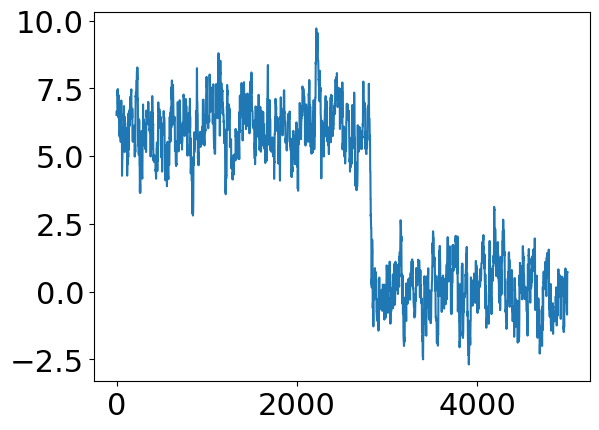

In [54]:
plt.plot(trace_rw[0][:,1])

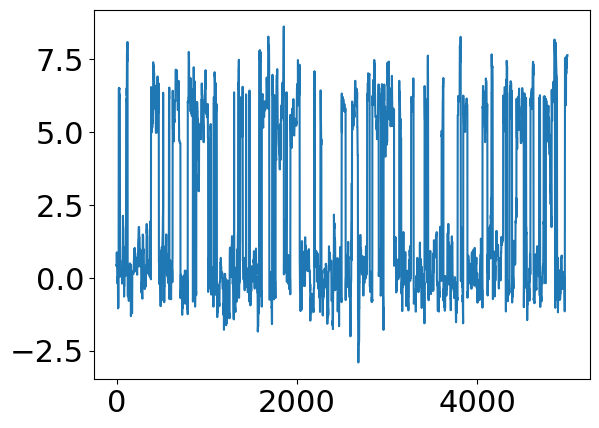

In [55]:
plt.plot(trace_acc[0][:,1])

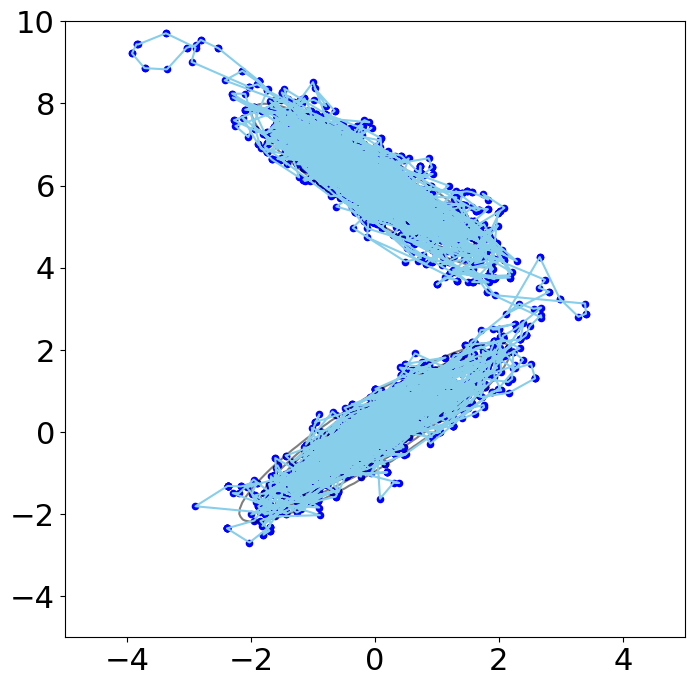

In [56]:

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 10)


cset = ax.contour(xx, yy, f,levels=10, colors='k',alpha=0.5)
ax.set_xlabel('')
ax.set_ylabel('')

ax.scatter(trace_rw[0][:,0],trace_rw[0][:,1],s=20, alpha=1, facecolors='blue')


ax.plot(trace_rw[0][:,0],trace_rw[0][:,1],c='skyblue',alpha=1)

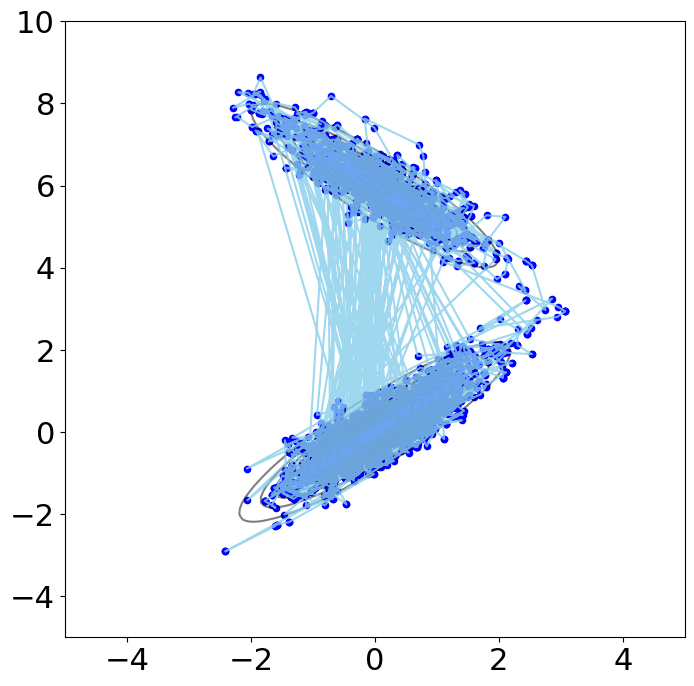

In [57]:

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 10)


cset = ax.contour(xx, yy, f,levels=10, colors='k',alpha=0.5)
ax.set_xlabel('')
ax.set_ylabel('')


ax.scatter(trace_acc[0][:,0],trace_acc[0][:,1],s=20, alpha=1, facecolors='blue')
ax.plot(trace_acc[0][:,0],trace_acc[0][:,1],c='skyblue',alpha=0.8)



In [33]:
#Comparing Effective Sample Sizes

In [34]:
import arviz

In [35]:
arviz.ess(trace_rw[0][:,1])

26.497698764305078

In [36]:
arviz.ess(trace_acc[0][:,1])

335.23504885125374